# Pulse of Prevention: Analyzing Heart Health for Better Outcomes


**Step 1: Import Libraries & Load Dataset**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (upload your CSV)
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

# Display first 5 rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Step 2: Data Cleaning and Preprocessing**

**Check Missing Values**

In [41]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Impute or Drop Missing Values**

In [42]:
data = data.dropna()  # or use fillna()


**Check Data Types**

In [43]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [44]:
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')
data['fbs'] = data['fbs'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['exang'] = data['exang'].astype('category')
data['ca'] = data['ca'].astype('category')
data['thal'] = data['thal'].astype('category')
data['target'] = data['target'].astype('category')


**Outlier Detection (Boxplots)**

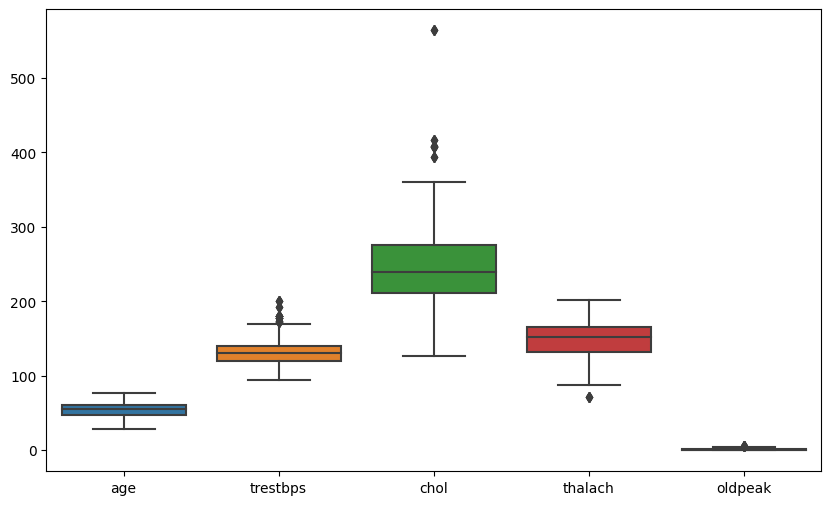

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['age','trestbps','chol','thalach','oldpeak']])
plt.show()


**Normalization (Optional)**

In [46]:
from sklearn.preprocessing import StandardScaler
num_cols = ['age','trestbps','chol','thalach','oldpeak']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


# Basic Level Questions

**1. What is the average age of patients in the dataset?**

In [47]:
avg_age = data['age'].mean()
avg_age


-3.5007227469156157e-16

**2. What is the gender distribution?**

In [48]:
gender_dist = data['sex'].value_counts()
gender_dist


sex
1    713
0    312
Name: count, dtype: int64

**3. Average Resting Blood Pressure**

In [49]:
data['trestbps'].mean()


-6.966784872574641e-16

**4. How many patients have fasting blood sugar > 120 mg/dl?**

In [51]:
# Convert fbs column to numeric
data['fbs'] = pd.to_numeric(data['fbs'], errors='coerce')

# Count patients with fasting blood sugar > 120 mg/dl
high_fbs_count = data['fbs'].sum()

print("Number of patients with fasting blood sugar > 120 mg/dl:", high_fbs_count)


Number of patients with fasting blood sugar > 120 mg/dl: 153


**5. What are the different chest pain types?**

In [ ]:
data['cp'].unique()


**6. Maximum Heart Rate Achieved**

In [ ]:
data['thalach'].max()


**7. % of patients with exercise-induced angina**

In [ ]:
# Convert exang column to numeric
data['exang'] = pd.to_numeric(data['exang'], errors='coerce')

# Calculate % of patients with exercise-induced angina
percent_exang = data['exang'].mean() * 100

percent_exang


**8. Average Cholesterol Level**

In [ ]:
data['chol'].mean()


**9. How many patients have Rest ECG==2?**

In [ ]:
data['restecg'].value_counts()[2]


**10. Distribution of major vessels "ca"**

In [ ]:
data['ca'].value_counts()


# Medium Level Questions

**11. Correlation between Age & Cholesterol**

In [ ]:
data[['age','chol']].corr()


**12. Chest Pain Types by Age Group**

In [ ]:
data.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', figsize=(14,6), stacked=True)
plt.show()


**13. Max Heart Rate vs Exercise Angina**

In [ ]:
data.groupby('exang')['thalach'].mean()


**14. Compare BP between genders**

In [ ]:
data.groupby('sex')['trestbps'].mean()


In [ ]:
from scipy.stats import ttest_ind
ttest_ind(data[data.sex==1]['trestbps'],
          data[data.sex==0]['trestbps'])


**15. FBS vs Heart Disease**

In [ ]:
pd.crosstab(data['fbs'], data['target']).plot(kind='bar')
plt.show()


**16. Vessels vs Heart Disease**

In [ ]:
pd.crosstab(data['ca'], data['target']).plot(kind='bar')
plt.show()


**17. Avg oldpeak by chest pain**

In [ ]:
data.groupby('cp')['oldpeak'].mean()


**18. Thal vs Heart Disease**

In [ ]:
pd.crosstab(data['thal'], data['target']).plot(kind='bar')
plt.show()


**19. Most Common Risk Factor Combinations**

In [ ]:
data[data['target']==1].groupby(['cp','fbs','exang','thal']).size().reset_index(name='counts').sort_values('counts',ascending=False)


**20. Pairwise Comparison**

In [ ]:
data[data['target']==1].describe()
data[data['target']==0].describe()


# Advanced Questions

**21. Multi-factor effect on heart disease**

In [ ]:
sns.pairplot(data, hue='target', vars=['age','chol','trestbps'])
plt.show()


**22. Strongest correlation with target**

In [ ]:
data.corr()['target'].sort_values(ascending=False)


**23. Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)


**24. Slope vs Chest Pain**

In [ ]:
data.groupby('cp')['slope'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()


**25. Thal vs Survival Trend**

In [ ]:
sns.lineplot(x='age', y='thal', hue='target', data=data)
plt.show()


**This case study provides a clear understanding of booking behavior, cancellation patterns, and customer preferences. Insights derived from the EDA can help hotels optimize pricing, reduce cancellations, improve operations, and enhance customer satisfaction.**